In [1]:
import ROOT

import numpy as np
import matplotlib.pyplot as plt

from scipy.integrate import quad

Welcome to JupyROOT 6.28/04


In [2]:
# Load the data to prepare the TGraph with S-factors
sfactor = ROOT.TGraph( "data/12c_pg.dat" )

# Defining some useful constants
M0 = 1.00727647   # Proton mass        (amu)
M1 = 12           # Carbon-12 mass     (amu)
Z0 = 1            # Proton charge
Z1 = 6            # Carbon charge
k  = 8.6171e+1    # Boltzmann constant (MeV GK^(-1))

# Reduced mass for Carbon-12 + Proton system
Mr = M0 * M1/( M0 + M1 )

In [3]:
# Returns the Cross Section from the S-factor
def cross_section( E ):
    return sfactor.Eval( E ) * np.exp( -0.989534 * Z0 * Z1 * np.sqrt( Mr / ( E / 1e3 ) ) ) / E

# Returns the Maxwell Boltzmann distribution
def maxwell_boltzmann( E, T ):
    return np.exp( - E / (k * T) )

# Returns the Gamow Peak
def gamow_peak( E, T ):
    return maxwell_boltzmann( E, T ) * cross_section( E, T )

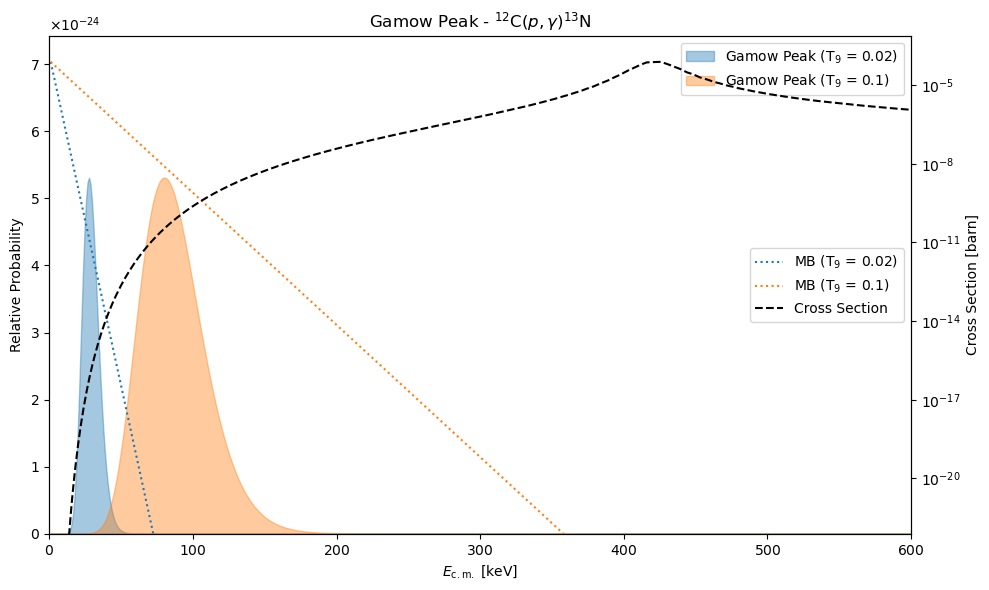

In [4]:
T1 = 0.02 # GK
T2 = 0.10 # GK

E_Step = 1
E_Min  = 1 
E_Max  = 2500

energies    = [ ]
maxwell_T1  = [ ]
maxwell_T2  = [ ]
cross       = [ ]
for E in range( E_Min, E_Max, E_Step ):
    energies.append( E )
    maxwell_T1.append( maxwell_boltzmann( E, T1 ) )
    maxwell_T2.append( maxwell_boltzmann( E, T2 ) )
    cross.append( cross_section( E ) )

energies, maxwell_T1, maxwell_T2, cross = np.asarray( energies ), np.asarray( maxwell_T1 ), np.asarray( maxwell_T2 ), np.asarray( cross )

norm_T1 = quad( lambda x: np.exp( - x / (k * T1) ), 0, 2 )[0]
norm_T2 = quad( lambda x: np.exp( - x / (k * T2) ), 0, 2 )[0]

maxwell_T1 /= norm_T1
maxwell_T2 /= norm_T2

gamow_T1 = maxwell_T1 * cross
gamow_T2 = maxwell_T2 * cross

plot_max = max( cross ) * 1e1
plot_min = max( cross ) / 1e18

scale_maxwell_T2 = max( cross ) / max( maxwell_T2 )
scale_maxwell_T1 = max( cross ) / max( maxwell_T1 )
scale_cross      = max( gamow_T2 ) / max( cross )
scale_gamow      = max( gamow_T1 ) / max( gamow_T2 )

fig, ax1 = plt.subplots( figsize=(10,6) )

ax1.fill( energies, gamow_T1, c="tab:blue", alpha=0.4, label="Gamow Peak (T$_9$ = {})".format(T1) )
ax1.fill( energies, scale_gamow * gamow_T2, c="tab:orange", alpha=0.4, label="Gamow Peak (T$_9$ = {})".format(T2) )

ax1.set_ylim( [0,1.4*max( gamow_T1 )])

ax2 = ax1.twinx( )

ax2.plot( energies, scale_maxwell_T1 * maxwell_T1, ls="dotted", label="MB (T$_9$ = {})".format(T1) )
ax2.plot( energies, scale_maxwell_T2 * maxwell_T2, ls="dotted", label="MB (T$_9$ = {})".format(T2) )
ax2.plot( energies, cross, ls="dashed", c="black", label="Cross Section" )

ax2.set_xlim( [0,600] )
ax2.set_yscale( "log" )

ax2.set_ylim( [plot_min,plot_max])

ax1.set_xlabel( "$E_{\mathrm{c.m.}}$ [keV]")

ax1.ticklabel_format(useMathText=True)

ax1.set_ylabel( "Relative Probability")
ax2.set_ylabel( "Cross Section [barn]")

ax1.set_title( "Gamow Peak - $^{12}$C($p,\gamma$)$^{13}$N")

plt.tight_layout()

ax1.legend( loc="upper right" )
ax2.legend( loc="center right" )

plt.show( )